<a href="https://colab.research.google.com/github/RutikBajad/RutikBajad/blob/main/Lab3_IAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
#Breadth First Search
City_Map = {
    'A' : ['B' ,'C'],
    'B' : ['A', 'D', 'E'],
    'C' : ['A', 'F', 'G'],
    'D' : ['B'],
    'E' : ['B'],
    'F' : ['C'],
    'G' : ['C']
}

from collections import deque

def city_map_traversal(City_Map, start):
    visited = set()
    queue = deque([start])
    print("Breadth First Search Traversal:\n")
    while(queue):
        intersection = queue.popleft()
        if intersection not in visited:
            print(intersection, end=" ")
            visited.add(intersection)

            for neighbour in City_Map[intersection]:
                if neighbour not in visited:
                    queue.append(neighbour)
city_map_traversal(City_Map, 'A')

Breadth First Search Traversal:

A B C D E F G 

This code implements a **Breadth-First Search (BFS)** algorithm to traverse a graph, which in this case represents a `City_Map`. BFS explores all the neighbor nodes at the current depth level before moving on to nodes at the next depth level.

Let's break down the code:

### 1. City_Map Definition

```python
City_Map = {
    'A' : ['B' ,'C'],
    'B' : ['A', 'D', 'E'],
    'C' : ['A', 'F', 'G'],
    'D' : ['B'],
    'E' : ['B'],
    'F' : ['C'],
    'G' : ['C']
}
```
- This dictionary `City_Map` represents the graph. Each key is a 'city' (or intersection), and its corresponding value is a list of directly connected 'cities' (its neighbors). This is known as an **adjacency list** representation of a graph.

### 2. Importing `deque`

```python
from collections import deque
```
- `deque` (double-ended queue) is imported from the `collections` module. A deque is preferred over a standard list for implementing a queue because it provides `append` and `popleft` operations with O(1) time complexity, which is more efficient than a list's `pop(0)` (O(n)).

### 3. `city_map_traversal` Function

```python
def city_map_traversal(City_Map, start):
    visited = set()
    queue = deque([start])
    print("Breadth First Search Traversal:\n")
    while(queue):
        intersection = queue.popleft()
        if intersection not in visited:
            print(intersection, end=" ")
            visited.add(intersection)

            for neighbour in City_Map[intersection]:
                if neighbour not in visited:
                    queue.append(neighbour)
```
- **`visited = set()`**: An empty set `visited` is initialized. This set keeps track of all the nodes that have already been visited to prevent infinite loops in graphs with cycles and to ensure each node is processed only once.
- **`queue = deque([start])`**: A `deque` is initialized as the queue for BFS. The `start` node (e.g., 'A') is added to the queue to begin the traversal.
- **`print("Breadth First Search Traversal:\n")`**: Simply prints a header for the output.
- **`while(queue):`**: The main loop of the BFS algorithm continues as long as there are nodes in the queue to process.
- **`intersection = queue.popleft()`**: Removes and returns the node at the front of the queue. This is the 'next' node to be explored.
- **`if intersection not in visited:`**: Checks if the current `intersection` has already been visited. This check is crucial because a node might be added to the queue multiple times (e.g., if multiple paths lead to it) before it's actually processed.
- **`print(intersection, end=" ")`**: If the `intersection` hasn't been visited, it's printed. `end=" "` ensures that the output nodes are separated by a space rather than a new line.
- **`visited.add(intersection)`**: Adds the current `intersection` to the `visited` set to mark it as processed.
- **`for neighbour in City_Map[intersection]:`**: Iterates through all the direct neighbors of the current `intersection` as defined in the `City_Map`.
- **`if neighbour not in visited:`**: For each neighbor, it checks if it has already been visited. If not, it means this is a new, unvisited node.
- **`queue.append(neighbour)`**: The unvisited `neighbour` is added to the end of the queue, making it eligible for future exploration.

### 4. Function Call

```python
city_map_traversal(City_Map, 'A')
```
- This line calls the `city_map_traversal` function, passing the `City_Map` and 'A' as the starting node for the BFS. This initiates the traversal.

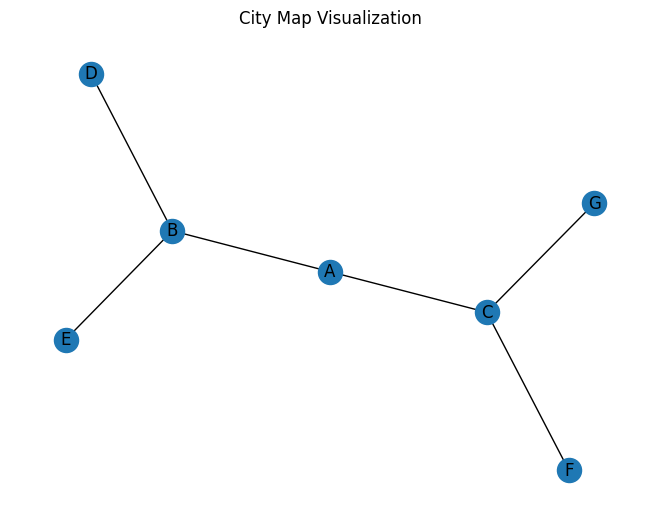

In [32]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph(City_Map)
pos = nx.spring_layout(G) # Generate positions for nodes
nx.draw(G, pos, with_labels=True) # Draw the graph with node labels
plt.title('City Map Visualization')
plt.axis('off') # Hide axes
plt.show()

This code implements a **Depth-First Search (DFS)** algorithm to traverse a graph, which in this case represents a `City_Map`. DFS explores as far as possible along each branch before backtracking.

Let's break down the code:

### 1. `dfs_city_traversal` Function

```python
def dfs_city_traversal(city_map, start, visited=None):
    if visited is None:
        visited = set()

    print(start, end=" ")
    visited.add(start)

    for neighbor in city_map[start]:
        if neighbor not in visited:
            dfs_city_traversal(city_map, neighbor, visited)
```
- **`def dfs_city_traversal(city_map, start, visited=None):`**: Defines the recursive DFS function. It takes three arguments:
    - `city_map`: The graph represented as an adjacency list (the `City_Map` dictionary).
    - `start`: The current node being visited.
    - `visited`: A set to keep track of visited nodes. It's initialized to `None` and then to an empty set if it's the first call, ensuring the `visited` set is shared across all recursive calls for a single traversal.

- **`if visited is None:`**: Checks if the `visited` set has been initialized. This is a common Python pattern for mutable default arguments in functions. If `visited` is `None`, it initializes an empty set.

- **`print(start, end=" ")`**: Prints the current `start` node. `end=" "` ensures that nodes are printed on the same line, separated by spaces.

- **`visited.add(start)`**: Adds the current `start` node to the `visited` set to mark it as processed.

- **`for neighbor in city_map[start]:`**: Iterates through all the direct neighbors of the current `start` node as defined in the `city_map`.

- **`if neighbor not in visited:`**: For each neighbor, it checks if it has already been visited. This is crucial to prevent revisiting nodes and falling into infinite loops in graphs with cycles.

- **`dfs_city_traversal(city_map, neighbor, visited)`**: If a neighbor has not been visited, the `dfs_city_traversal` function is called recursively with that `neighbor` as the new `start` node. This is the core of DFS, exploring deep into a branch before backtracking.

### 2. Function Call

```python
print("DFS Traversal:\n")
dfs_city_traversal(City_Map, 'A')
```
- **`print("DFS Traversal:\n")`**: Prints a header indicating the start of the DFS traversal output.
- **`dfs_city_traversal(City_Map, 'A')`**: Initiates the DFS traversal by calling the function with the `City_Map` and 'A' as the starting node.

In [33]:
#Depth First Search

def dfs_city_traversal(city_map, start, visited=None):
    if visited is None:
        visited = set()

    print(start, end=" ")
    visited.add(start)

    for neighbor in city_map[start]:
        if neighbor not in visited:
            dfs_city_traversal(city_map, neighbor, visited)

print("DFS Traversal:\n")
dfs_city_traversal(City_Map, 'A')


DFS Traversal:

A B D E C F G 